# Desafios

# Desafio 1: Utilizando parâmetros do json_normalize

Ao normalizar o objeto JSON durante a aula passamos simplesmente ```pd.json_normalize()``` mas o método json_normalize possui diversos parâmetros para trabalhar com estruturas de dados mais complexas.

Você recebeu a tarefa de normalizar o seguinte arquivo JSON chamado [“informacoes.json”](https://cdn3.gnarususercontent.com.br/2929-pandas/informacoes.json) referente a algumas informações de identificação de um cliente. O arquivo possui o seguinte conteúdo:

In [ ]:
{
  "nome": "João",
  "idade": 28,
  "enderecos": [
    {
      "tipo": "casa",
      "rua": "Rua A",
      "numero": 123,
      "cidade": "São Paulo"
    },
    {
      "tipo": "trabalho",
      "rua": "Rua B",
      "numero": 456,
      "cidade": "Rio de Janeiro"
    }
  ]
}

O resultado final deve ser um Pandas DataFrame que possui a seguinte estrutura:

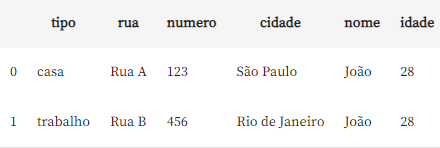

Como podemos fazer isso?

In [ ]:
import json

with open('informacoes.json') as f:
    dados = json.load(f)

In [ ]:
import pandas as pd

informacoes = pd.json_normalize(dados, record_path='enderecos', meta=['nome', 'idade'])

## Desafio 2

Você recebeu e fez o [download o arquivo JSON chamado “dados.json”](https://cdn3.gnarususercontent.com.br/2929-pandas/dados.json). Sua tarefa é realizar alguns tratamentos e deixar esse arquivo JSON como um Pandas DataFrame, sem dados vazios e com a tipagem das colunas de forma correta. Como isso pode ser feito?

In [2]:
import pandas as pd
import json

with open('dados.json') as f:
    dados_json = json.load(f)    

In [3]:
dados_json

{'pessoas': [{'nome': 'JoÃ£o',
   'idade': '25',
   'endereco': {'rua': 'Rua A', 'numero': 123, 'cidade': 'SÃ£o Paulo'},
   'telefones': ['11 1111-1111', '11 2222-2222']},
  {'nome': 'Maria',
   'idade': 30,
   'endereco': {'rua': '', 'numero': 456, 'cidade': 'Rio de Janeiro'},
   'telefones': ['21 3333-3333']}]}

In [7]:
df = pd.json_normalize(dados_json, record_path=['pessoas'])
df

,nome,idade,telefones,endereco.rua,endereco.numero,endereco.cidade
0,JoÃ£o,25,"[11 1111-1111, 11 2222-2222]",Rua A,123,SÃ£o Paulo
1,Maria,30,[21 3333-3333],,456,Rio de Janeiro


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   nome             2 non-null      object
 1   idade            2 non-null      object
 2   telefones        2 non-null      object
 3   endereco.rua     2 non-null      object
 4   endereco.numero  2 non-null      int64 
 5   endereco.cidade  2 non-null      object
dtypes: int64(1), object(5)
memory usage: 224.0+ bytes


In [20]:
df['idade'] = df['idade'].astype('int')

In [21]:
df_filtrado = df.query('`endereco.rua` != ""')
df_filtrado

,nome,idade,telefones,endereco.rua,endereco.numero,endereco.cidade
0,João,25,"[11 1111-1111, 11 2222-2222]",Rua A,123,São Paulo


### Desafio 3 - Tratando uma base de dados

Para facilitar a análise dos dados de cadastro de cursos de uma plataforma, você recebeu um [arquivo chamado cursos_cadastrados.json](https://cdn3.gnarususercontent.com.br/2929-pandas/cursos_cadastrados.json). Você foi informado que esses dados podem apresentar problemas que podem prejudicar a análise e interpretação correta dos dados.

Para resolver isso, foi solicitado que você identifique e remova as amostras que apresentam os seguintes problemas:

- Valores nulos: são valores ausentes em algumas das colunas que devem ser preenchidos para que a análise seja correta.
- Duplicatas: registros iguais que podem prejudicar a análise dos dados, já que estão representando a mesma informação.
- Strings vazias: valores de texto que não apresentam nenhum conteúdo escrito, o que pode dificultar a análise de dados, principalmente se a coluna tiver muitos valores assim.
- Conversão de tipos: algumas colunas do arquivo podem estar no tipo de dados errado, como texto em vez de número, o que pode prejudicar a análise. Nesse caso você deve realizar a conversão para o tipo correto de cada coluna.

Dentro desse contexto, você precisará de uma abordagem sistemática para limpar os dados. Assim, como isso pode ser feito?


In [23]:
import pandas as pd
import json

with open('cursos_cadastrados.json', 'r') as f:
    data = json.load(f)

df = pd.json_normalize(data)
df

,curso,categoria,carga_horaria,concluintes,data_inicio,data_conclusao,descricao,preco,instrutor.nome,instrutor.email,instrutor.telefone
0,IntroduÃ§Ã£o Ã programaÃ§Ã£o,ProgramaÃ§Ã£o,20 horas,100,2022-01-01,2022-01-20,Curso introdutÃ³rio Ã programaÃ§Ã£o com Python,99.90,JoÃ£o Silva,joao.silva@emailaleatorio.com,(11) 9999-9999
1,Excel para iniciantes,Produtividade,None,None,None,None,None,None,Maria Oliveira,maria.oliveira@emailaleatorio.com,(11) 8888-8888
2,Marketing digital para negÃ³cios,Marketing,30 horas,75,2022-03-01,2022-03-31,Curso introdutÃ³rio em marketing,89.9,Ana Santos,ana.santos@emailaleatorio.com,(11) 7777-7777
3,InteligÃªncia artificial,ProgramaÃ§Ã£o,40 horas,,2022-04-01,,Curso avanÃ§ado sobre inteligÃªncia artificial...,129.9,,contato@emailaleatorio.com,
4,InglÃªs para negÃ³cios,Idiomas,20 horas,30,,,Curso de inglÃªs para negÃ³cios,69.9,John Smith,,
5,IntroduÃ§Ã£o Ã programaÃ§Ã£o,ProgramaÃ§Ã£o,20 horas,100,2022-01-01,2022-01-20,Curso introdutÃ³rio Ã programaÃ§Ã£o com Python,99.90,JoÃ£o Silva,joao.silva@emailaleatorio.com,(11) 9999-9999


In [24]:
df.isnull().sum().sum()

6

In [25]:
df[df.isna().any(axis=1)]

,curso,categoria,carga_horaria,concluintes,data_inicio,data_conclusao,descricao,preco,instrutor.nome,instrutor.email,instrutor.telefone
1,Excel para iniciantes,Produtividade,None,None,None,None,None,None,Maria Oliveira,maria.oliveira@emailaleatorio.com,(11) 8888-8888


In [26]:
df.dropna(inplace=True)

In [27]:
df.duplicated()

0    False
2    False
3    False
4    False
5     True
dtype: bool

In [28]:
df.drop_duplicates(inplace=True)

In [29]:
df[df['instrutor.nome'] == ""]

,curso,categoria,carga_horaria,concluintes,data_inicio,data_conclusao,descricao,preco,instrutor.nome,instrutor.email,instrutor.telefone
3,InteligÃªncia artificial,ProgramaÃ§Ã£o,40 horas,,2022-04-01,,Curso avanÃ§ado sobre inteligÃªncia artificial...,129.9,,contato@emailaleatorio.com,


In [30]:
df[df['data_conclusao'] == ""]

,curso,categoria,carga_horaria,concluintes,data_inicio,data_conclusao,descricao,preco,instrutor.nome,instrutor.email,instrutor.telefone
3,InteligÃªncia artificial,ProgramaÃ§Ã£o,40 horas,,2022-04-01,,Curso avanÃ§ado sobre inteligÃªncia artificial...,129.9,,contato@emailaleatorio.com,
4,InglÃªs para negÃ³cios,Idiomas,20 horas,30,,,Curso de inglÃªs para negÃ³cios,69.9,John Smith,,


In [31]:
# Substitui strings vazias por valores nulos
df.replace('', pd.NA, inplace=True)

In [33]:
df.dropna(inplace=True)
df

,curso,categoria,carga_horaria,concluintes,data_inicio,data_conclusao,descricao,preco,instrutor.nome,instrutor.email,instrutor.telefone
0,IntroduÃ§Ã£o Ã programaÃ§Ã£o,ProgramaÃ§Ã£o,20 horas,100,2022-01-01,2022-01-20,Curso introdutÃ³rio Ã programaÃ§Ã£o com Python,99.90,JoÃ£o Silva,joao.silva@emailaleatorio.com,(11) 9999-9999
2,Marketing digital para negÃ³cios,Marketing,30 horas,75,2022-03-01,2022-03-31,Curso introdutÃ³rio em marketing,89.9,Ana Santos,ana.santos@emailaleatorio.com,(11) 7777-7777


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2 entries, 0 to 2
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   curso               2 non-null      object
 1   categoria           2 non-null      object
 2   carga_horaria       2 non-null      object
 3   concluintes         2 non-null      object
 4   data_inicio         2 non-null      object
 5   data_conclusao      2 non-null      object
 6   descricao           2 non-null      object
 7   preco               2 non-null      object
 8   instrutor.nome      2 non-null      object
 9   instrutor.email     2 non-null      object
 10  instrutor.telefone  2 non-null      object
dtypes: object(11)
memory usage: 192.0+ bytes


In [35]:
df['concluintes'] = df['concluintes'].astype(int)
df['data_inicio'] = pd.to_datetime(df['data_inicio'])
df['data_conclusao'] = pd.to_datetime(df['data_conclusao'])
df['preco'] = df['preco'].astype(float)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2 entries, 0 to 2
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   curso               2 non-null      object        
 1   categoria           2 non-null      object        
 2   carga_horaria       2 non-null      object        
 3   concluintes         2 non-null      int32         
 4   data_inicio         2 non-null      datetime64[ns]
 5   data_conclusao      2 non-null      datetime64[ns]
 6   descricao           2 non-null      object        
 7   preco               2 non-null      float64       
 8   instrutor.nome      2 non-null      object        
 9   instrutor.email     2 non-null      object        
 10  instrutor.telefone  2 non-null      object        
dtypes: datetime64[ns](2), float64(1), int32(1), object(7)
memory usage: 184.0+ bytes


## Desafio 3

Você trabalha em um banco como cientista de dados e recebeu o seguinte conjunto de dados para analisar:

In [37]:
import pandas as pd

# criando um DataFrame com 30 transações aleatórias
df = pd.DataFrame({
    'ID da transação': range(1, 31),
    'Valor da transação': [100, 200, 150, 500, 300, 913, 250, 400, 200, 150, 
                           200, 200, 400, 300, 150, 301, 805, 300, 400, 250, 
                           150, 100, 500, 600, 200, 350, 100, 250, 800, 250],
    'Data da transação': pd.date_range(start='2022-01-01', end='2022-01-30', freq='D'),
    'Local da transação': ['São Paulo, Brasil', 'Rio de Janeiro, Brasil', 'Belo Horizonte, Brasil', 'São Paulo, Brasil', 
                           'São Paulo, Brasil', 'Nova Iorque, EUA', 'São Paulo, Brasil', 'São Paulo, Brasil', 'São Paulo, Brasil',
                           'Rio de Janeiro, Brasil', 'São Paulo, Brasil', 'São Paulo, Brasil', 'São Paulo, Brasil', 'São Paulo, Brasil',
                           'São Paulo, Brasil', 'São Paulo, Brasil', 'Los Angeles, EUA', 'São Paulo, Brasil', 'São Paulo, Brasil', 'São Paulo, Brasil',
                           'São Paulo, Brasil', 'São Paulo, Brasil', 'São Paulo, Brasil', 'São Paulo, Brasil', 'São Paulo, Brasil', 'São Paulo, Brasil',
                           'São Paulo, Brasil', 'São Paulo, Brasil', 'Miami, EUA', 'São Paulo, Brasil']
})

Foi informado que nessa base de dados há possíveis fraudes que podem ser identificadas através dos outliers no “valor da transação”. Basicamente a fraude seria um outlier.

Sua missão é construir uma função que recebe dois parâmetros, a coluna que você quer analisar se tem outlier e o DataFrame em questão. A intenção de fazer isso é aproveitar novamente essa função tanto para outras colunas quanto para outros DataFrames futuramente em outras análises. O método que deve ser implementado para identificação do outlier é do intervalo interquartil.

Como podemos fazer isso?

In [38]:
def calc_outliers(column, dataframe): 

  # calculando o IQR e definindo o limite para outliers
  Q1 = dataframe[column].quantile(0.25)
  Q3 = dataframe[column].quantile(0.75)
  IQR = Q3 - Q1
  limite_inferior = Q1 - 1.5 * IQR
  limite_superior = Q3 + 1.5 * IQR

  # identificando os outliers
  outliers = dataframe[(dataframe[column] < limite_inferior) | (dataframe[column] > limite_superior)]

  # retornando os outliers
  return outliers

In [40]:
calc_outliers('Valor da transação', df)

,ID da transação,Valor da transação,Data da transação,Local da transação
5,6,913,2022-01-06,"Nova Iorque, EUA"
16,17,805,2022-01-17,"Los Angeles, EUA"
28,29,800,2022-01-29,"Miami, EUA"
